In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/da/Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [ ]:
data.columns = ['Total','East','West'] # giving short column name
data.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [ ]:
data.describe()

,Total,East,West
count,143608.000000,143608.000000,143608.000000
mean,111.162735,50.547616,60.615119
std,141.443433,65.157096,87.921215
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,146.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143630 entries, 2019-11-01 00:00:00 to 2021-07-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   143608 non-null  float64
 1   East    143608 non-null  float64
 2   West    143608 non-null  float64
dtypes: float64(3)
memory usage: 4.4 MB


In [ ]:
# summary statistics 
data.dropna().describe()

,Total,East,West
count,143608.000000,143608.000000,143608.000000
mean,111.162735,50.547616,60.615119
std,141.443433,65.157096,87.921215
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,146.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


In [ ]:
data.isnull().sum()

Total    22
East     22
West     22
dtype: int64

#### Visualizing data

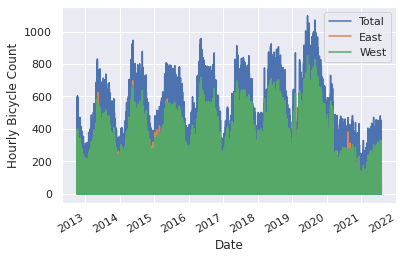

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
data.plot();
plt.ylabel('Hourly Bicycle Count');

In [ ]:
weekly = data.resample('W').sum()
weekly.head()

,Total,East,West
Date,,,
2012-10-07,28584.0,14594.0,13990.0
2012-10-14,33590.0,17358.0,16232.0
2012-10-21,31018.0,15892.0,15126.0
2012-10-28,26874.0,13802.0,13072.0
2012-11-04,24388.0,12816.0,11572.0


Text(0, 0.5, 'Weekly Bicycle count')

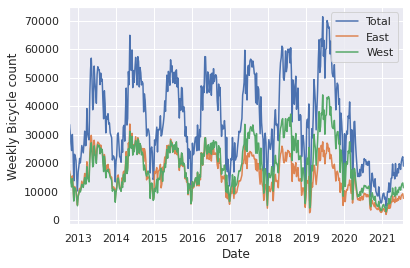

In [ ]:
weekly.plot();
plt.ylabel('Weekly Bicycle count')

In [ ]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [ ]:
# Calculating the bicycle count by time.
by_time = data.groupby(data.index.time).sum()
by_time.head()

,Total,East,West
00:00:00,66002.0,27837.0,38165.0
01:00:00,34819.0,15508.0,19311.0
02:00:00,22793.0,10893.0,11900.0
03:00:00,16859.0,8647.0,8212.0
04:00:00,38266.0,20013.0,18253.0


Here, the total count of bicycle at each hour is calculated.


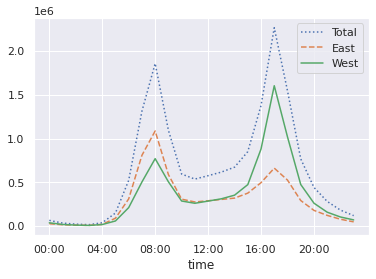

In [ ]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style=[':','--','-']);

In [ ]:
data.index.dayofweek

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
           dtype='int64', name='Date', length=143630)

In [ ]:
# Calculating bicycle count in each day of week.
by_weekdays = data.groupby(data.index.dayofweek).mean()
by_weekdays

,Total,East,West
Date,,,
0,128.690671,56.992047,71.698624
1,137.328323,61.081544,76.246779
2,136.577196,60.769919,75.807277
3,129.801451,58.125925,71.675526
4,117.539920,52.601384,64.938536
5,65.338255,32.526998,32.811257
6,62.762279,31.695098,31.067181


#### Assigning days in weekly data.

In [ ]:
by_weekdays.index 

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='Date')

In [ ]:
by_weekdays.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
by_weekdays 

,Total,East,West
Mon,128.690671,56.992047,71.698624
Tue,137.328323,61.081544,76.246779
Wed,136.577196,60.769919,75.807277
Thu,129.801451,58.125925,71.675526
Fri,117.539920,52.601384,64.938536
Sat,65.338255,32.526998,32.811257
Sun,62.762279,31.695098,31.067181


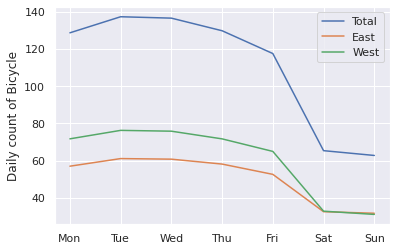

In [ ]:
by_weekdays.plot()
plt.ylabel('Daily count of Bicycle');